In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from sklearn.decomposition import TruncatedSVD

import umap

/Users/ben/venv/py310/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ben/venv/py310/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ben/venv/py310/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarni

In [22]:
%load_ext rpy2.ipython

In [17]:
def run_umap(df: pd.DataFrame, nn: int=15, md: float=0.2, somr: float=0.25, nc=2):
    umapper = umap.UMAP(
        n_neighbors=nn,
        n_components=nc,
        min_dist=md,
        set_op_mix_ratio=somr,
        metric='euclidean',
        # UMAP figures change with every run if not seeded
        random_state=42
    )

    return (umapper.fit_transform(df), umapper)

In [3]:
# mathematically I think it makes no sense to normalize _before_ scaling. It may
# not even make sense to do it afterwards. It is worth mentioning that the DF
# we're importing here was built using a TFIDF vectorizer trained on ONLY the
# stopwords, so the row sums will be roughly one anyway (because those are the
# only types they count). In actual fact they will be more than one because we
# marge some spelling variations and apparently most texts use some of each
# (??!)

def preproc(df: pd.DataFrame, robust: bool=False, norm: bool=True) -> pd.DataFrame:
    if robust:
        df = RobustScaler().fit_transform(df)
    else:
        df = StandardScaler().fit_transform(df)
    if norm:
        df = Normalizer().fit_transform(df)
    return df

In [4]:
stops_tidy = pd.read_csv('../data/corpus.csv',index_col=0)
df = stops_tidy[~stops_tidy.Translator.str.contains('Myst')]
df

,Translator,Work,Chunk,atqui,aut,autem,certe,ceu,confestim,cum,...,sic,sicut,siquidem,tamquam,ut,utique,uelut,ueluti,uero,uidelicet
0,Bur,Com,quoniam quidem ex calido et frigido et sicco e...,0.0,0.097100,0.534050,0.0,0.0,0.0,0.145650,...,0.000000,0.000000,0.000000,0.0,0.145650,0.218475,0.024275,0.0,0.218475,0.0
1,Bur,Com,sermo non quod nunquam fit in uno eodemque cor...,0.0,0.200297,0.578636,0.0,0.0,0.0,0.155787,...,0.000000,0.000000,0.022255,0.0,0.222552,0.311573,0.022255,0.0,0.066766,0.0
2,Bur,Com,horis anni invenire quartam coniugationem comp...,0.0,0.230022,0.575055,0.0,0.0,0.0,0.000000,...,0.046004,0.000000,0.000000,0.0,0.253024,0.138013,0.046004,0.0,0.230022,0.0
3,Bur,Com,quod necesse est in ea putrefieri omnia incipi...,0.0,0.243044,0.710436,0.0,0.0,0.0,0.037391,...,0.000000,0.000000,0.000000,0.0,0.280435,0.168261,0.000000,0.0,0.037391,0.0
4,Bur,Com,de ipsis per capitula quantum ad presentia uti...,0.0,0.649435,0.409426,0.0,0.0,0.0,0.070591,...,0.000000,0.000000,0.000000,0.0,0.395308,0.211772,0.000000,0.0,0.070591,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,Bur,Fid,ostendat quod secundum veritatem est homo cum ...,0.0,0.024500,0.538996,0.0,0.0,0.0,0.171499,...,0.000000,0.000000,0.000000,0.0,0.587995,0.024500,0.000000,0.0,0.024500,0.0
1181,Bur,Fid,causative dicere ut hoc tibi soli peccavi et p...,0.0,0.000000,0.421459,0.0,0.0,0.0,0.049583,...,0.000000,0.000000,0.000000,0.0,0.223125,0.049583,0.024792,0.0,0.074375,0.0
1182,Bur,Fid,condemnavit peccatum in carne ut iustitia legi...,0.0,0.000000,0.738485,0.0,0.0,0.0,0.096324,...,0.000000,0.032108,0.000000,0.0,0.481621,0.064216,0.032108,0.0,0.032108,0.0
1183,Bur,Fid,uxorem suam et concepit et genuit quare propte...,0.0,0.000000,0.666795,0.0,0.0,0.0,0.156893,...,0.000000,0.078446,0.000000,0.0,0.274563,0.039223,0.000000,0.0,0.039223,0.0


In [35]:
wil = stops_tidy[stops_tidy.Translator == 'Wil']

In [36]:
wil = stops_tidy[stops_tidy.Translator == 'Wil']
wil_X = wil.drop(['Translator','Work','Chunk'], axis=1)
umap_cols, umapper = run_umap(preproc(wil_X,robust=False,norm=False),md=0.2,nn=8)
wil.insert(2, "Y", umap_cols[:,1])
wil.insert(2, "X", umap_cols[:,0])

In [37]:
myst3 = stops_tidy.query("Work=='3' & Translator=='Myst'")
umap_cols = umapper.transform(myst3.drop(['Translator','Work','Chunk'], axis=1))
myst3.insert(2, "Y", umap_cols[:,1])
myst3.insert(2, "X", umap_cols[:,0])

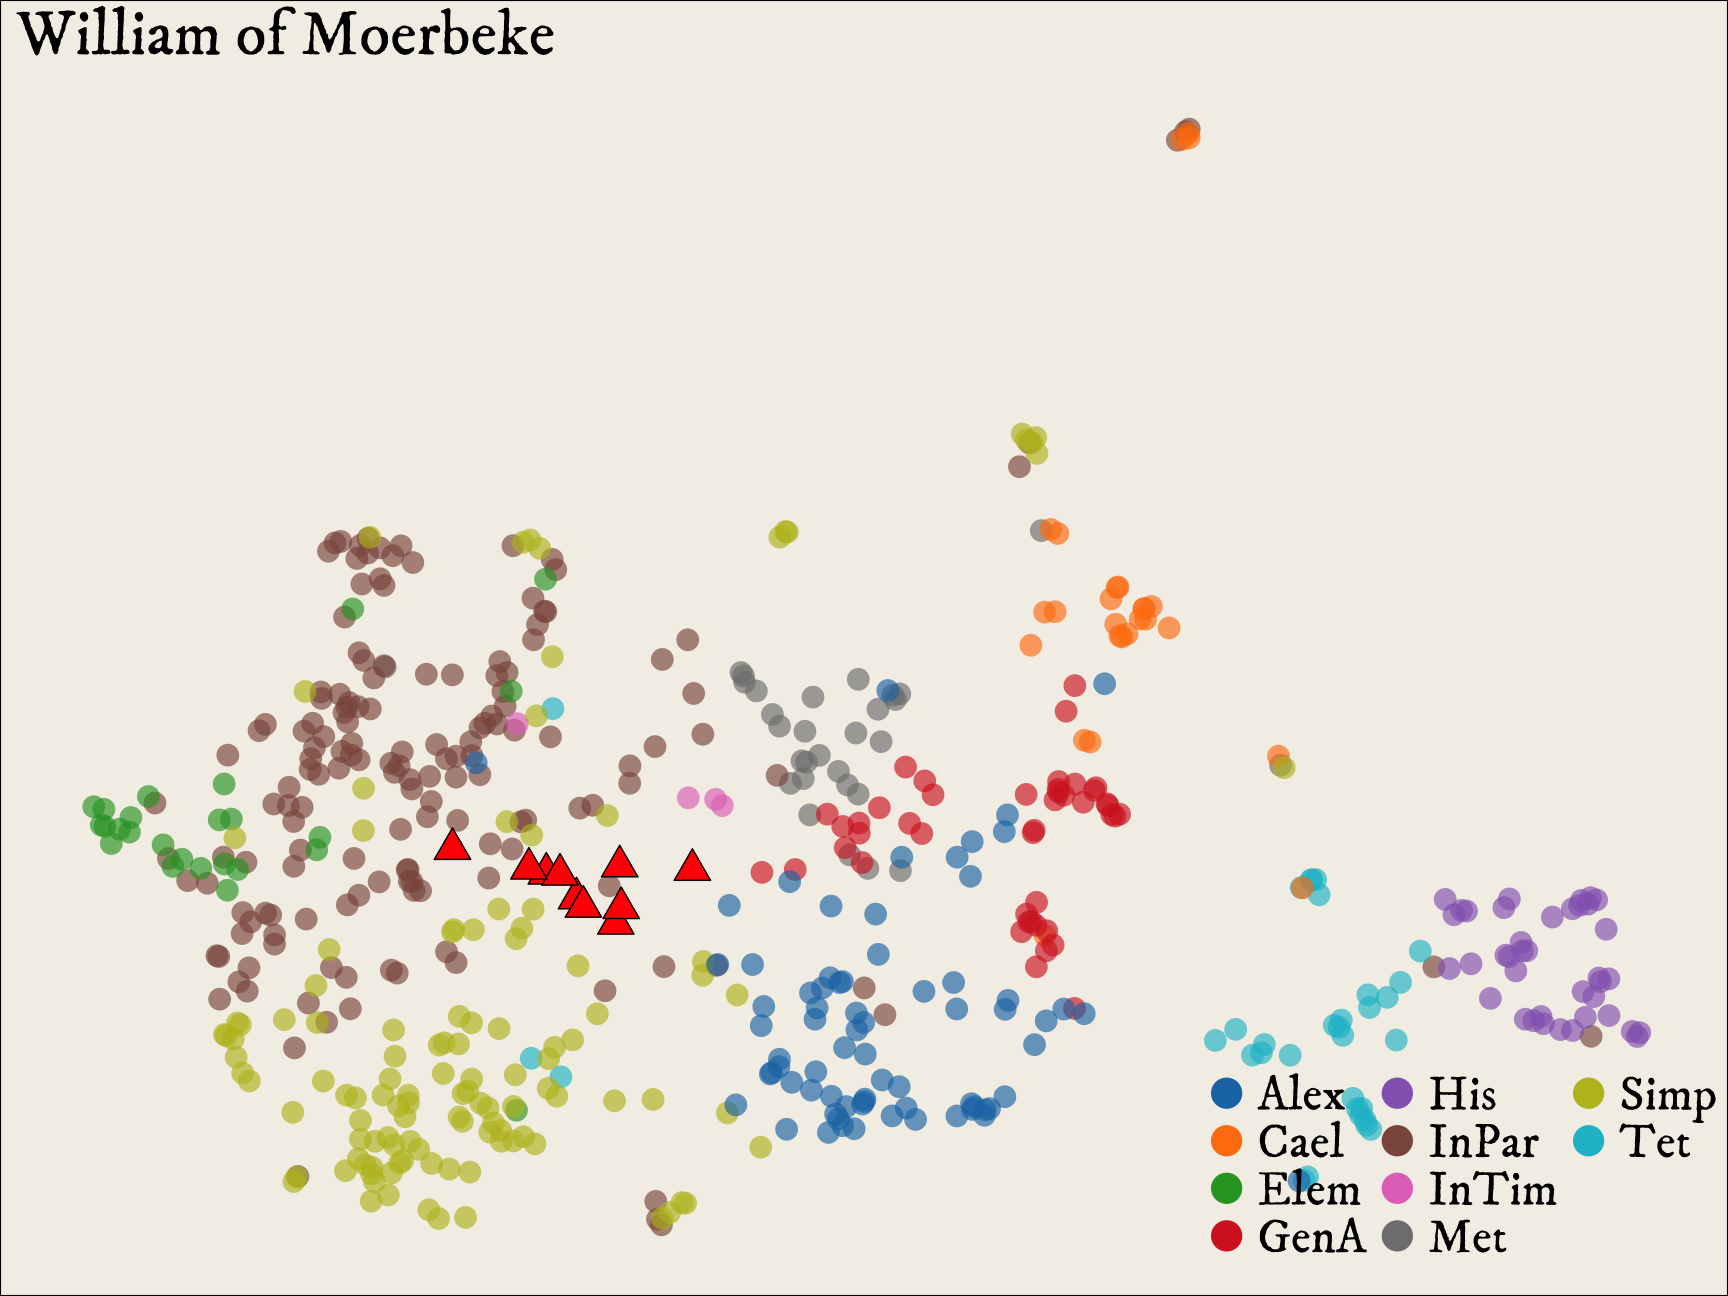

In [38]:
%%R -i wil,myst3 -h 9 -w 12 -u in -r 144

library(ggplot2)
library(paletteer)
library(showtext)
font_add_google("IM Fell DW Pica", "fnt")
showtext_auto()

bgcol = '#f4f0e8'
fgcol = 'black'

ggplot(data=wil, aes(x=X, y=Y)) +
geom_point(size=5, alpha=0.65, shape=16, aes(color=Work)) +
geom_point(data=myst3, size=6, shape=24, color='black', fill='red', alpha=1) +
theme_minimal() +
scale_colour_paletteer_d("ggsci::category20_d3") +
theme(plot.title = element_text(margin = margin(b = 50))) +
ggtitle("William of Moerbeke") +
guides(color = guide_legend(ncol=3,override.aes =list(size=7,alpha=1))) +
    theme(
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol),
        plot.title=element_text(margin=margin(0,0,0,0),size=32),
        legend.title=element_blank(),
        legend.position=c(0.85,0.1),
        legend.text=element_text(size=24),
        legend.key.size = unit(0, 'lines'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text=element_text(family="fnt",color=fgcol),
        panel.grid.minor=element_blank(),
        panel.grid.major=element_blank()
    )

In [143]:
all = stops_tidy[(stops_tidy.Translator != 'Myst') | (stops_tidy.Work.isin(['3','6','1']))].copy()
#all = stops_tidy[(stops_tidy.Translator != 'Myst')].copy()

all_X = all.drop(['Translator','Work','Chunk'], axis=1)
ss = StandardScaler(with_mean=False)
umap_cols, umapper = run_umap(ss.fit_transform(all_X), nc=2, nn=7, somr=0.75, md=0.4)
all.insert(2, "Y", umap_cols[:,1])
all.insert(2, "X", umap_cols[:,0])

In [146]:
myst3 = stops_tidy.query("Work=='3' & Translator=='Myst'")
umap_cols = umapper.transform(ss.transform(myst3.drop(['Translator','Work','Chunk'], axis=1)))
myst3.insert(2, "Y", umap_cols[:,1])
myst3.insert(2, "X", umap_cols[:,0])

In [141]:
myst6 = stops_tidy.query("Work=='6' & Translator=='Myst'")
umap_cols = umapper.transform(myst6.drop(['Translator','Work','Chunk'], axis=1))
myst6.insert(2, "Y", umap_cols[:,1])
myst6.insert(2, "X", umap_cols[:,0])

In [144]:
myst1 = stops_tidy.query("Work=='1' & Translator=='Myst'")
umap_cols = umapper.transform(myst1.drop(['Translator','Work','Chunk'], axis=1))
myst1.insert(2, "Y", umap_cols[:,1])
myst1.insert(2, "X", umap_cols[:,0])

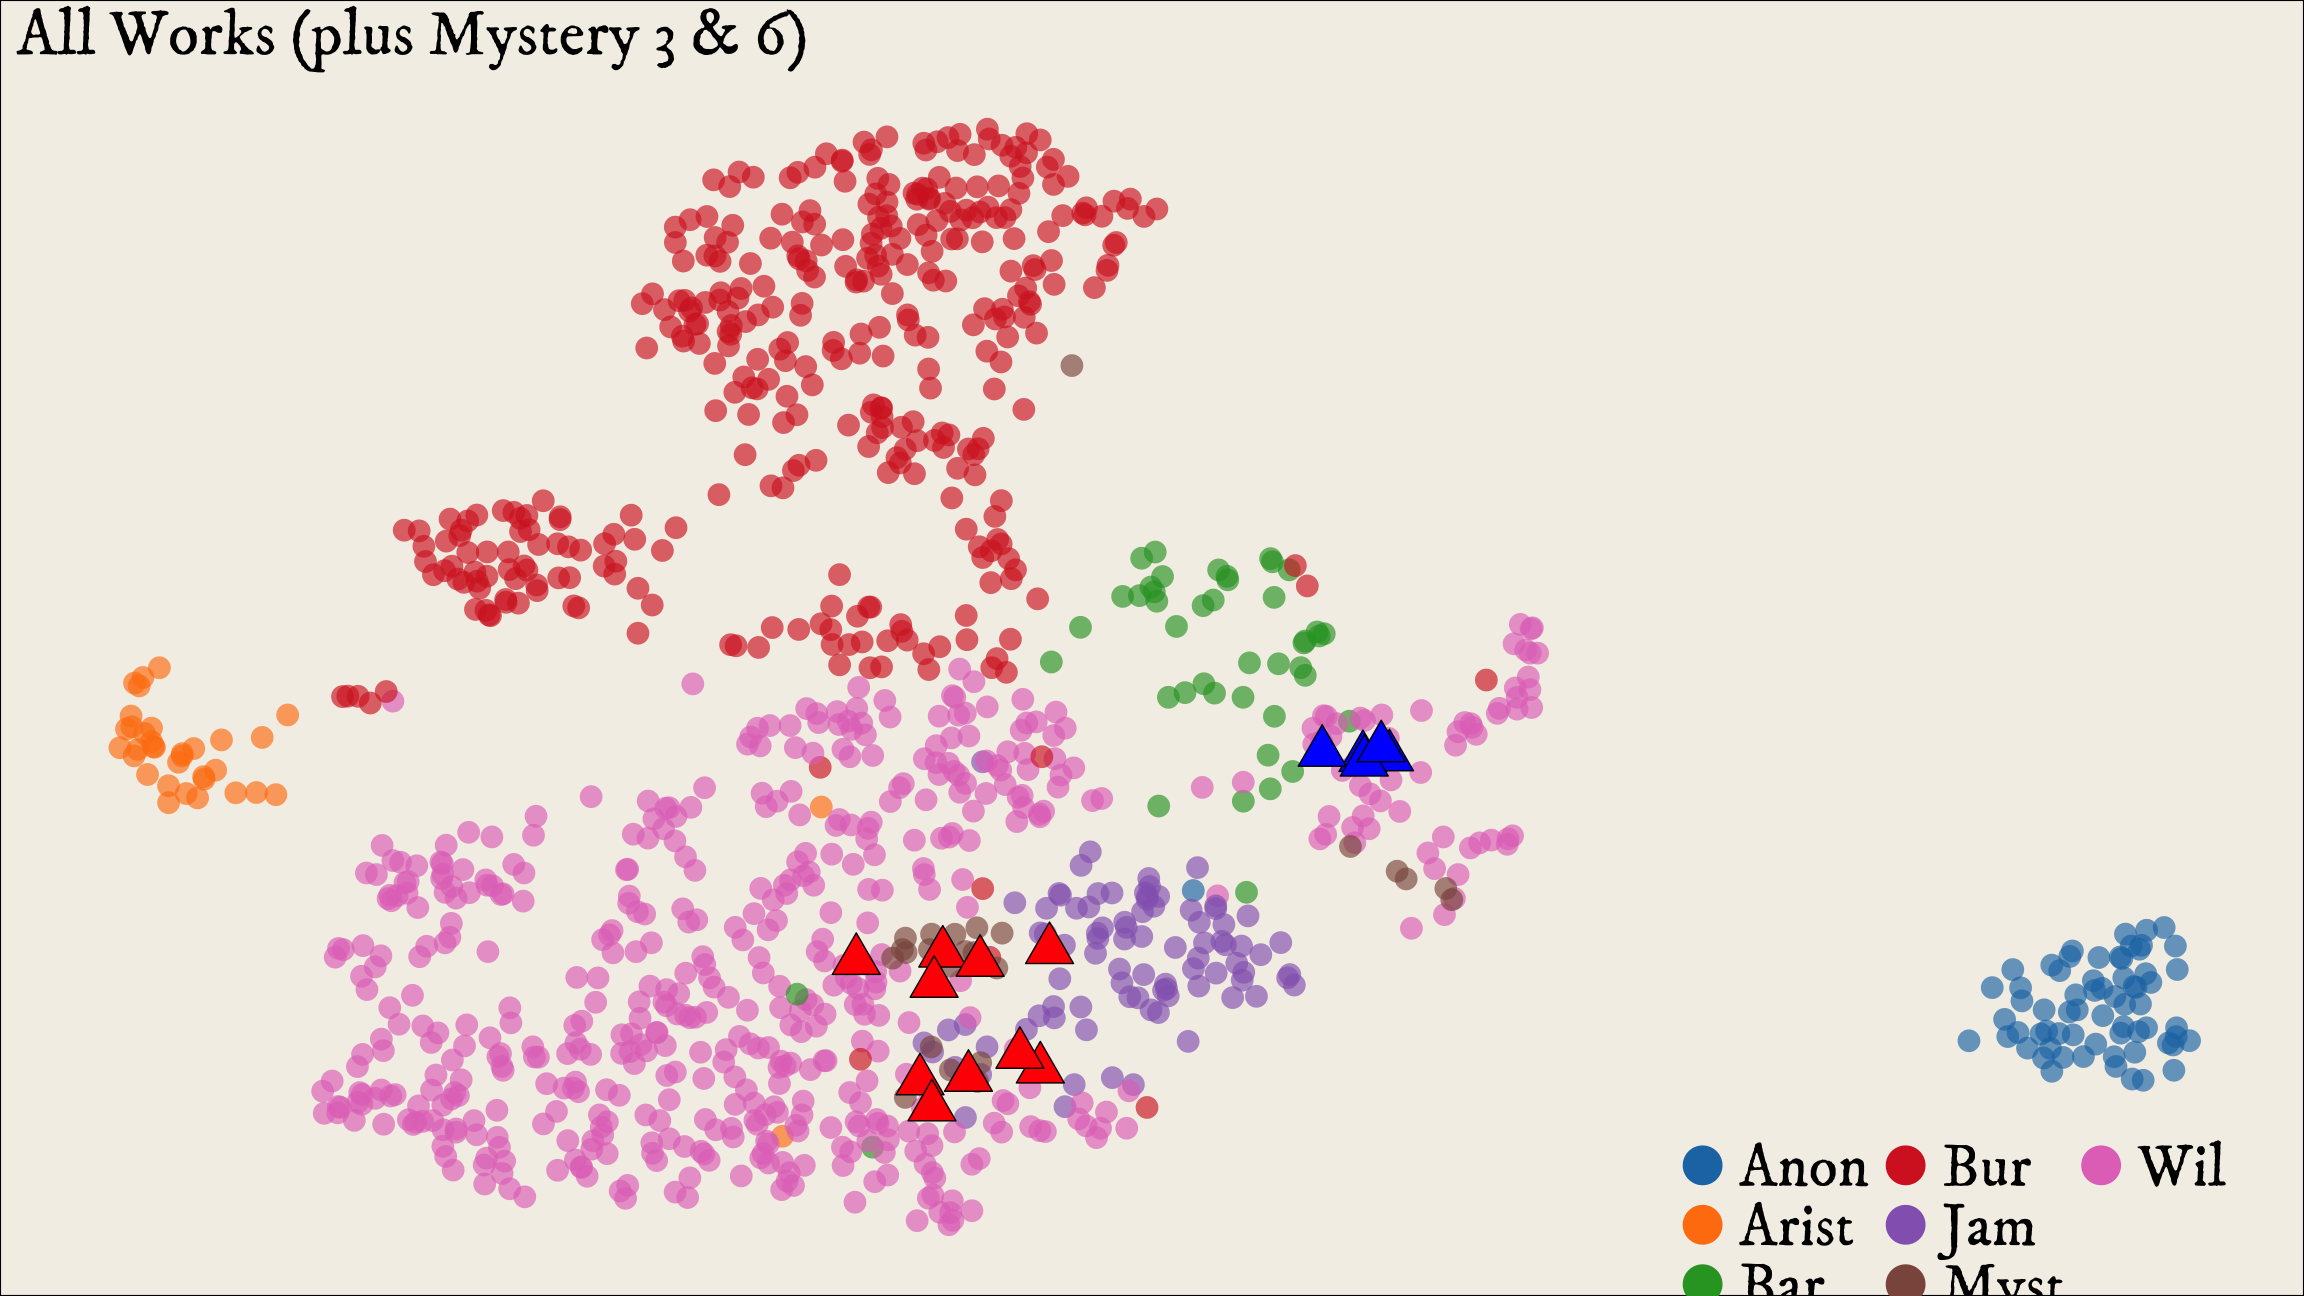

In [147]:
%%R -i all,myst3,myst1 -h 9 -w 16 -u in -r 144

library(ggplot2)
library(paletteer)
library(showtext)
font_add_google("IM Fell DW Pica", "fnt")
showtext_auto()

bgcol = '#f4f0e8' # antique paper
fgcol = 'black'

ggplot(data=all, aes(x=X, y=Y)) +
geom_point(size=5, alpha=0.65, shape=16, aes(color=Translator)) +
geom_point(data=myst3, size=8, shape=24, color='black', fill='red', alpha=1) +
geom_point(data=myst1, size=8, shape=24, color='black', fill='blue', alpha=1) +
theme_minimal() +
scale_colour_paletteer_d("ggsci::category20_d3") +
theme(plot.title = element_text(margin = margin(b = 50))) +
ggtitle("All Works (plus Mystery 3 & 6)") +
guides(color = guide_legend(ncol=3,override.aes =list(size=9,alpha=1))) +
    theme(
        panel.border = element_blank(),
        panel.background = element_rect(fill = bgcol,color=bgcol),
        plot.background = element_rect(fill = bgcol),
        plot.title=element_text(margin=margin(0,0,0,0),size=32),
        legend.title=element_blank(),
        legend.position=c(0.85,0.05),
        legend.text=element_text(size=30),
        legend.key.size = unit(0, 'lines'),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        text=element_text(family="fnt",color=fgcol),
        panel.grid.minor=element_blank(),
        panel.grid.major=element_blank()
    )